In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import uproot
import awkward as ak

def shift_nans(input_array):
    
    nan_mask = np.isnan(input_array)
    output_array = np.array([np.concatenate((row[nan_mask_row], row[~nan_mask_row])) for row, nan_mask_row in zip(input_array, nan_mask)])

    return output_array

def process_coords(input_ak_array):
    return shift_nans(ak.to_numpy(ak.pad_none(input_ak_array, target = 6, clip=True)).filled(np.nan))
    

for i in range(0, 50):
    output_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df" + str(i) + ".csv"
    trackstates_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/" + str(i) + "/trackstates_fitter.root"
    tracksummary_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/" + str(i) + "/tracksummary_fitter.root"

    file = uproot.open(trackstates_path)
    tree_input = file["trackstates"]

    X_TRUTH = process_coords(tree_input["t_x"].array())
    GLOBAL_X_HIT = process_coords(tree_input["g_x_hit"].array())
    LOCAL_X_HIT = process_coords(tree_input["l_x_hit"].array())

    Y_TRUTH = process_coords(tree_input["t_y"].array())
    GLOBAL_Y_HIT = process_coords(tree_input["g_y_hit"].array())
    LOCAL_Y_HIT = process_coords(tree_input["l_y_hit"].array())

    Z_TRUTH = process_coords(tree_input["t_z"].array())
    GLOBAL_Z_HIT = process_coords(tree_input["g_z_hit"].array())

    file.close()

    file = uproot.open(tracksummary_path)
    tree_input = file["tracksummary"]

    QOP_FIT = ak.to_numpy(ak.flatten(tree_input["eQOP_fit"].array()))
    PHI_FIT = ak.to_numpy(ak.flatten(tree_input["ePHI_fit"].array()))
    THETA_FIT = ak.to_numpy(ak.flatten(tree_input["eTHETA_fit"].array()))

    P_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_p"].array()))
    Q_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_charge"].array()))
    PZ_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_pz"].array()))
    PHI_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_phi"].array()))
    THETA_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_theta"].array()))

    CHI2SUM = ak.to_numpy(ak.flatten(tree_input["chi2Sum"].array()))
    NDF = ak.to_numpy(ak.flatten(tree_input["NDF"].array()))

    file.close()

    P_FIT = Q_TRUTH/QOP_FIT
    PZ_FIT = P_FIT*np.cos(THETA_FIT)

    df_columns = [
                "QOP_FIT", "PHI_FIT", "THETA_FIT", "P_FIT", "PZ_FIT", 
                "P_TRUTH", "Q_TRUTH", "PZ_TRUTH", "PHI_TRUTH", "THETA_TRUTH", 
                "CHI2SUM", "NDF", 
                "X_TRUTH_6", "X_TRUTH_5", "X_TRUTH_4", "X_TRUTH_3", "X_TRUTH_2", "X_TRUTH_1", 
                "GLOBAL_X_HIT_6", "GLOBAL_X_HIT_5", "GLOBAL_X_HIT_4", "GLOBAL_X_HIT_3", "GLOBAL_X_HIT_2", "GLOBAL_X_HIT_1", 
                "LOCAL_X_HIT_6", "LOCAL_X_HIT_5", "LOCAL_X_HIT_4", "LOCAL_X_HIT_3", "LOCAL_X_HIT_2", "LOCAL_X_HIT_1", 
                "Y_TRUTH_6", "Y_TRUTH_5", "Y_TRUTH_4", "Y_TRUTH_3", "Y_TRUTH_2", "Y_TRUTH_1", 
                "GLOBAL_Y_HIT_6", "GLOBAL_Y_HIT_5", "GLOBAL_Y_HIT_4", "GLOBAL_Y_HIT_3", "GLOBAL_Y_HIT_2", "GLOBAL_Y_HIT_1", 
                "LOCAL_Y_HIT_6", "LOCAL_Y_HIT_5", "LOCAL_Y_HIT_4", "LOCAL_Y_HIT_3", "LOCAL_Y_HIT_2", "LOCAL_Y_HIT_1", 
                "Z_TRUTH_6", "Z_TRUTH_5", "Z_TRUTH_4", "Z_TRUTH_3", "Z_TRUTH_2", "Z_TRUTH_1", 
                "GLOBAL_Z_HIT_6", "GLOBAL_Z_HIT_5", "GLOBAL_Z_HIT_4", "GLOBAL_Z_HIT_3", "GLOBAL_Z_HIT_2", "GLOBAL_Z_HIT_1"
    ]

    df_data = [
                QOP_FIT, PHI_FIT, THETA_FIT, P_FIT, PZ_FIT,
                P_TRUTH, Q_TRUTH, PZ_TRUTH, PHI_TRUTH, THETA_TRUTH, 
                CHI2SUM, NDF, 
                X_TRUTH[:,0], X_TRUTH[:,1], X_TRUTH[:,2], X_TRUTH[:,3], X_TRUTH[:,4], X_TRUTH[:,5], 
                GLOBAL_X_HIT[:,0], GLOBAL_X_HIT[:,1], GLOBAL_X_HIT[:,2], GLOBAL_X_HIT[:,3], GLOBAL_X_HIT[:,4], GLOBAL_X_HIT[:,5], 
                LOCAL_X_HIT[:,0], LOCAL_X_HIT[:,1], LOCAL_X_HIT[:,2], LOCAL_X_HIT[:,3], LOCAL_X_HIT[:,4], LOCAL_X_HIT[:,5], 
                Y_TRUTH[:,0], Y_TRUTH[:,1], Y_TRUTH[:,2], Y_TRUTH[:,3], Y_TRUTH[:,4], Y_TRUTH[:,5], 
                GLOBAL_Y_HIT[:,0], GLOBAL_Y_HIT[:,1], GLOBAL_Y_HIT[:,2], GLOBAL_Y_HIT[:,3], GLOBAL_Y_HIT[:,4], GLOBAL_Y_HIT[:,5], 
                LOCAL_Y_HIT[:,0], LOCAL_Y_HIT[:,1], LOCAL_Y_HIT[:,2], LOCAL_Y_HIT[:,3], LOCAL_Y_HIT[:,4], LOCAL_Y_HIT[:,5], 
                Z_TRUTH[:,0], Z_TRUTH[:,1], Z_TRUTH[:,2], Z_TRUTH[:,3], Z_TRUTH[:,4], Z_TRUTH[:,5], 
                GLOBAL_Z_HIT[:,0], GLOBAL_Z_HIT[:,1], GLOBAL_Z_HIT[:,2], GLOBAL_Z_HIT[:,3], GLOBAL_Z_HIT[:,4], GLOBAL_Z_HIT[:,5]
    ]

    df = pd.DataFrame(data=np.column_stack(df_data), columns=df_columns)
    df.to_csv(output_path)

In [3]:
from scipy.stats import norm

def Fit_Gaussian(x):

    x_no_nan = x[~np.isnan(x)]
    mu, std = norm.fit(x_no_nan)

    return x_no_nan, mu, std

In [4]:
from scipy.stats import norm

def Residual_Plot(x, label = "", save = False, bins=100):
    """
    Residual_Plot takes a 1D input of data and plots it as a frequency density histogram, overlaying a fitted normal distribution.

    Inputs
    x: 1D input data, Pandas series or Numpy array
    label: adds labels to the x axis and file name if save is set to true, string
    save: if True will save the plot as label_residual_plot.png, boolean
    bins: number of bins for the histogram, integer

    Returns
    mu: the mean of the fitted normal distribution, float
    std: the standard deviation of the fitted normal distribution, float
    fig: the matplotlib figure containing the final graph, matplotlib figure
    """

    x, mu, std = Fit_Gaussian(x)

    norm_x = np.arange(start = np.min(x), stop = np.max(x), step = 0.0001)
    norm_y = norm.pdf(norm_x, mu, std)

    fig = plt.figure(figsize = (4, 4), dpi = 200)
    plt.hist(x, bins = bins, density = True)
    plt.plot(norm_x, norm_y)
    
    if label != "":
        plt.xlabel("Residual in " + label)

    plt.ylabel("Frequency Density")
    plt.text(x = -0.5, y = -1.2, s = "Mean : " + str(mu) + " mm" + "\nSigma : " + str(std) + " mm", size = 10)
    plt.show()

    if save == True:
        plt.savfig(label + "_residual_plot.png")

    return mu, std, fig



In [5]:
def Plot_Dataframe(df, offsets_y, offsets_z, tag = ""):

    y_tot_res = 0
    z_tot_res = 0

    for i in range(0, len(offsets_y)):
        print("Expected Offsets:")
        print("Layer " + str(i + 1) + ":")
        print("Y: " + str(offsets_y[i]))
        print("Z: " + str(offsets_z[i]))
        
        mu_y, std_y, fig_y = Residual_Plot(df["GLOBAL_Y_HIT_" + str(i+1)] - df["Y_TRUTH_" + str(i+1)], label = tag + " Y" + str(i+1))
        
        mu_z, std_z, fig_z = Residual_Plot(df["GLOBAL_Z_HIT_" + str(i+1)] - df["Z_TRUTH_" + str(i+1)], label = tag + " Z" + str(i+1))

        y_res = np.abs(mu_y - offsets_y[i])
        z_res = np.abs(mu_z - offsets_z[i])

        y_tot_res += y_res
        z_tot_res += z_res

        print("Difference Offsets:")
        print("Y: " + str(y_res))
        print("Z: " + str(z_res))

    print("Total Residual in Y: " + str(y_tot_res))
    print("Total Residual in Z: " + str(z_tot_res))

In [6]:
def Calculate_Offset(df_arr, offsets_y, offsets_z):
    

    output_dict = {"TRUTH_OFFSET_Y_1": [], "TRUTH_OFFSET_Y_2": [], "TRUTH_OFFSET_Y_3": [], "TRUTH_OFFSET_Y_4": [], "TRUTH_OFFSET_Y_5": [], "TRUTH_OFFSET_Y_6": [], 
                   "TRUTH_OFFSET_Z_1": [], "TRUTH_OFFSET_Z_2": [], "TRUTH_OFFSET_Z_3": [], "TRUTH_OFFSET_Z_4": [], "TRUTH_OFFSET_Z_5": [], "TRUTH_OFFSET_Z_6": [], 
                   "FIT_OFFSET_Y_1": [], "FIT_OFFSET_Y_2": [], "FIT_OFFSET_Y_3": [], "FIT_OFFSET_Y_4": [], "FIT_OFFSET_Y_5": [], "FIT_OFFSET_Y_6": [], 
                   "FIT_OFFSET_Z_1": [], "FIT_OFFSET_Z_2": [], "FIT_OFFSET_Z_3": [], "FIT_OFFSET_Z_4": [], "FIT_OFFSET_Z_5": [], "FIT_OFFSET_Z_6": [],
                   "RESIDUAL_Y_1": [], "RESIDUAL_Y_2": [], "RESIDUAL_Y_3": [], "RESIDUAL_Y_4": [], "RESIDUAL_Y_5": [], "RESIDUAL_Y_6": [], 
                   "RESIDUAL_Z_1": [], "RESIDUAL_Z_2": [], "RESIDUAL_Z_3": [], "RESIDUAL_Z_4": [], "RESIDUAL_Z_5": [], "RESIDUAL_Z_6": [], 
                   "REL_ERROR_Y_1": [], "REL_ERROR_Y_2": [], "REL_ERROR_Y_3": [], "REL_ERROR_Y_4": [], "REL_ERROR_Y_5": [], "REL_ERROR_Y_6": [], 
                   "REL_ERROR_Z_1": [], "REL_ERROR_Z_2": [], "REL_ERROR_Z_3": [], "REL_ERROR_Z_4": [], "REL_ERROR_Z_5": [], "REL_ERROR_Z_6": []}
                   
    for i in range(0, len(df_arr)):

        df = df_arr[i]

        for j in range(0, len(offsets_y[0])):

            _y, mu_y, std_y = Fit_Gaussian(df["GLOBAL_Y_HIT_" + str(j+1)] - df["Y_TRUTH_" + str(j+1)])
        
            _z, mu_z, std_z = Fit_Gaussian(df["GLOBAL_Z_HIT_" + str(j+1)] - df["Z_TRUTH_" + str(j+1)])

            output_dict["TRUTH_OFFSET_Y_" + str(j+1)].append(offsets_y[i][j])
            output_dict["TRUTH_OFFSET_Z_" + str(j+1)].append(offsets_z[i][j])
            output_dict["FIT_OFFSET_Y_" + str(j+1)].append(mu_y)
            output_dict["FIT_OFFSET_Z_" + str(j+1)].append(mu_z)
            output_dict["RESIDUAL_Y_" + str(j+1)].append((mu_y - offsets_y[i][j]))
            output_dict["RESIDUAL_Z_" + str(j+1)].append((mu_z - offsets_z[i][j]))
            if offsets_y[i][j] != 0:
                output_dict["REL_ERROR_Y_" + str(j+1)].append((mu_y - offsets_y[i][j])/offsets_y[i][j])
            else:
                output_dict["REL_ERROR_Y_" + str(j+1)].append(np.nan)
            if offsets_z[i][j] != 0:   
                output_dict["REL_ERROR_Z_" + str(j+1)].append((mu_z - offsets_z[i][j])/offsets_z[i][j])
            else:
                output_dict["REL_ERROR_Z_" + str(j+1)].append(np.nan)


    output_df = pd.DataFrame(data = output_dict)

    return output_df

In [7]:
offsets_y = np.loadtxt("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/offsets_z.csv", delimiter = ",")

In [8]:
df0 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df0.csv", index_col=0)
df1 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df1.csv", index_col=0)
df2 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df2.csv", index_col=0)
df3 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df3.csv", index_col=0)
df4 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df4.csv", index_col=0)
df5 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df5.csv", index_col=0)
df6 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df6.csv", index_col=0)
df7 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df7.csv", index_col=0)
df8 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df8.csv", index_col=0)
df9 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df9.csv", index_col=0)
df10 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df10.csv", index_col=0)
df11 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df11.csv", index_col=0)
df12 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df12.csv", index_col=0)
df13 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df13.csv", index_col=0)
df14 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df14.csv", index_col=0)
df15 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df15.csv", index_col=0)
df16 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df16.csv", index_col=0)
df17 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df17.csv", index_col=0)
df18 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df18.csv", index_col=0)
df19 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df19.csv", index_col=0)
df20 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df20.csv", index_col=0)
df21 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df21.csv", index_col=0)
df22 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df22.csv", index_col=0)
df23 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df23.csv", index_col=0)
df24 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df24.csv", index_col=0)
df25 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df25.csv", index_col=0)
df26 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df26.csv", index_col=0)
df27 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df27.csv", index_col=0)
df28 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df28.csv", index_col=0)
df29 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df29.csv", index_col=0)
df30 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df30.csv", index_col=0)
df31 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df31.csv", index_col=0)
df32 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df32.csv", index_col=0)
df33 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df33.csv", index_col=0)
df34 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df34.csv", index_col=0)
df35 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df35.csv", index_col=0)
df36 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df36.csv", index_col=0)
df37 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df37.csv", index_col=0)
df38 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df38.csv", index_col=0)
df39 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df39.csv", index_col=0)
df40 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df40.csv", index_col=0)
df41 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df41.csv", index_col=0)
df42 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df42.csv", index_col=0)
df43 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df43.csv", index_col=0)
df44 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df44.csv", index_col=0)
df45 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df45.csv", index_col=0)
df46 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df46.csv", index_col=0)
df47 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df47.csv", index_col=0)
df48 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df48.csv", index_col=0)
df49 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/gaussian_offset_big/df49.csv", index_col=0)



In [9]:
df_arr = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, 
          df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, 
          df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, 
          df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, 
          df40, df41, df42, df43, df44, df45, df46, df47, df48, df49]

In [10]:
offset_df = Calculate_Offset(df_arr, offsets_y, offsets_z)

Expected Offsets:
Layer 1:
Y: 0.0
Z: 0.0


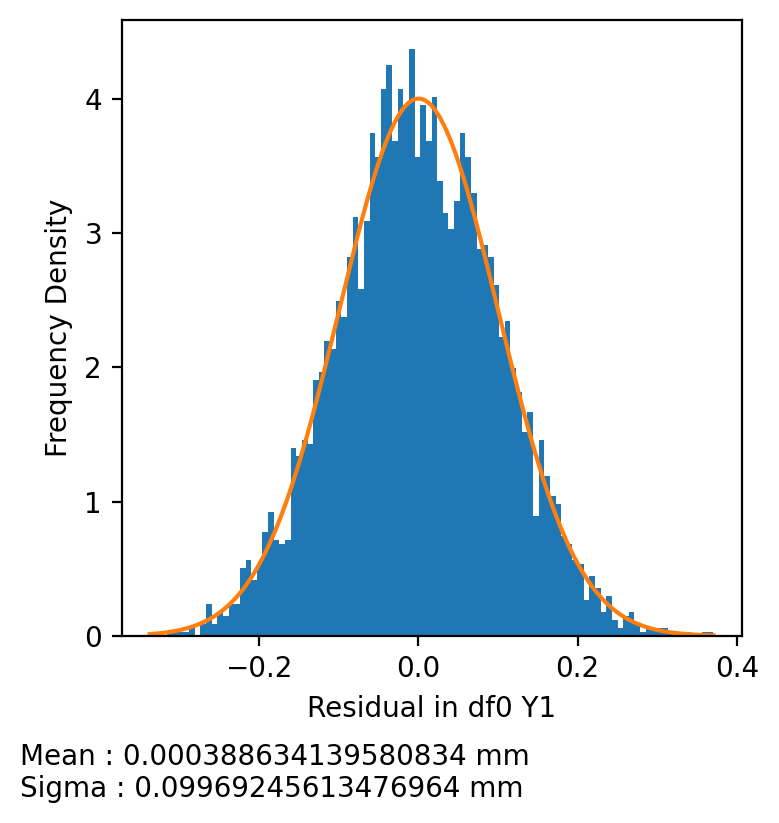

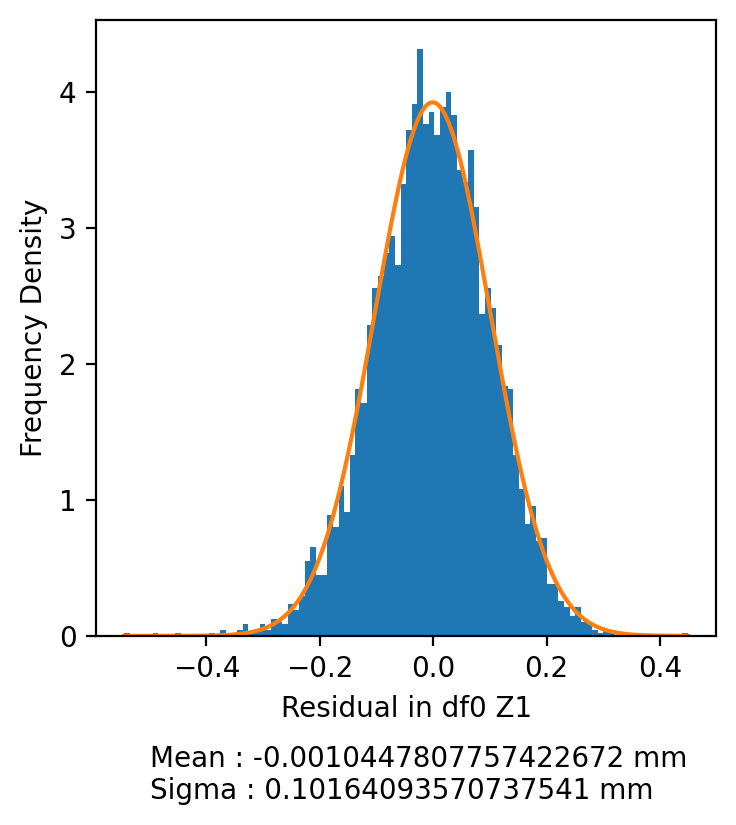

Difference Offsets:
Y: 0.000388634139580834
Z: 0.0010447807757422672
Expected Offsets:
Layer 2:
Y: -0.10315960784414871
Z: -0.37100206035049604


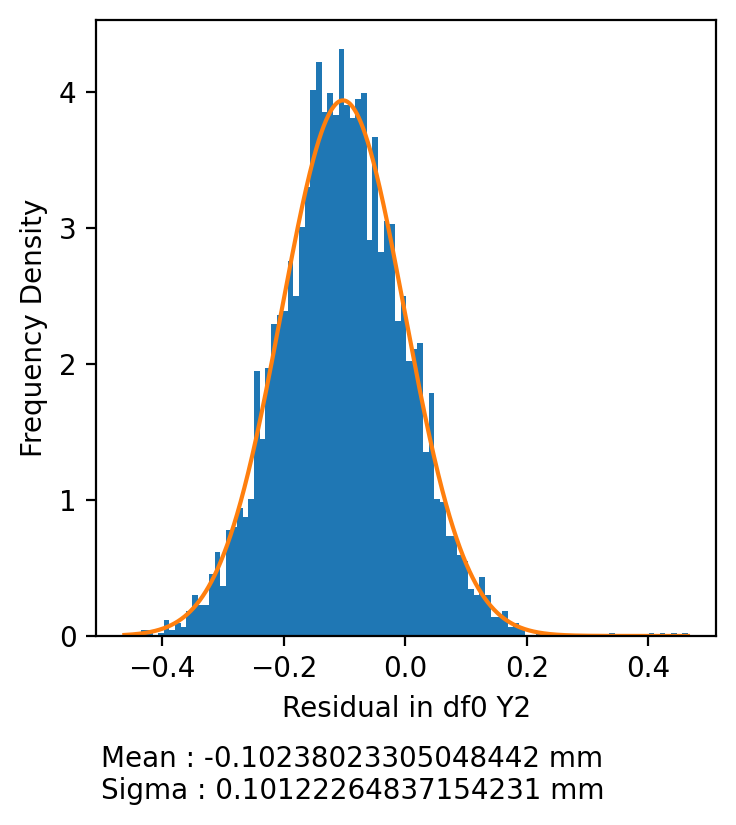

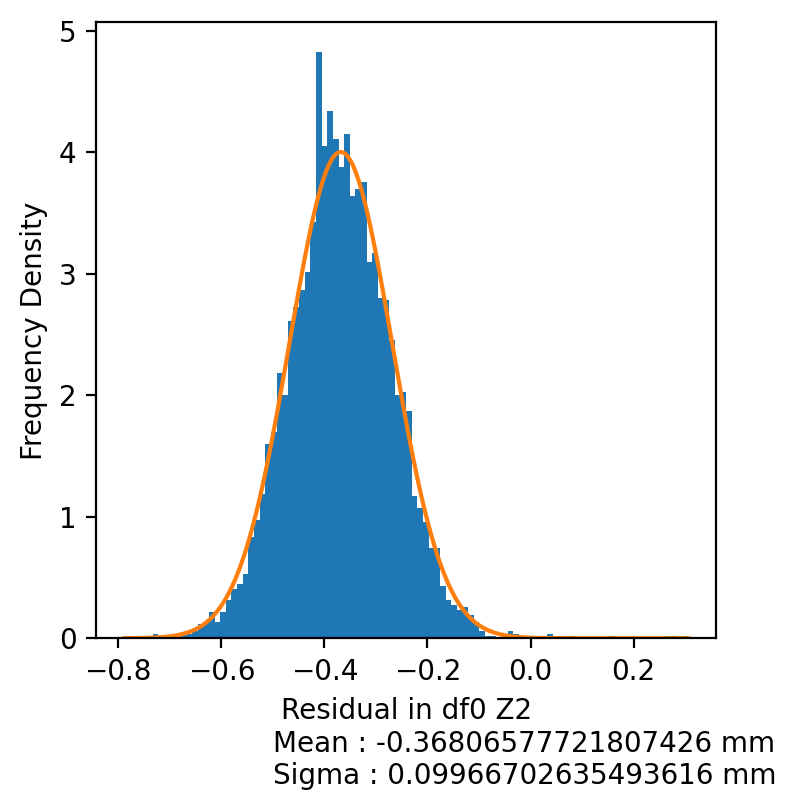

Difference Offsets:
Y: 0.0007793747936642864
Z: 0.0029362831324217797
Expected Offsets:
Layer 3:
Y: 0.40266001657707967
Z: 0.02094727533915063


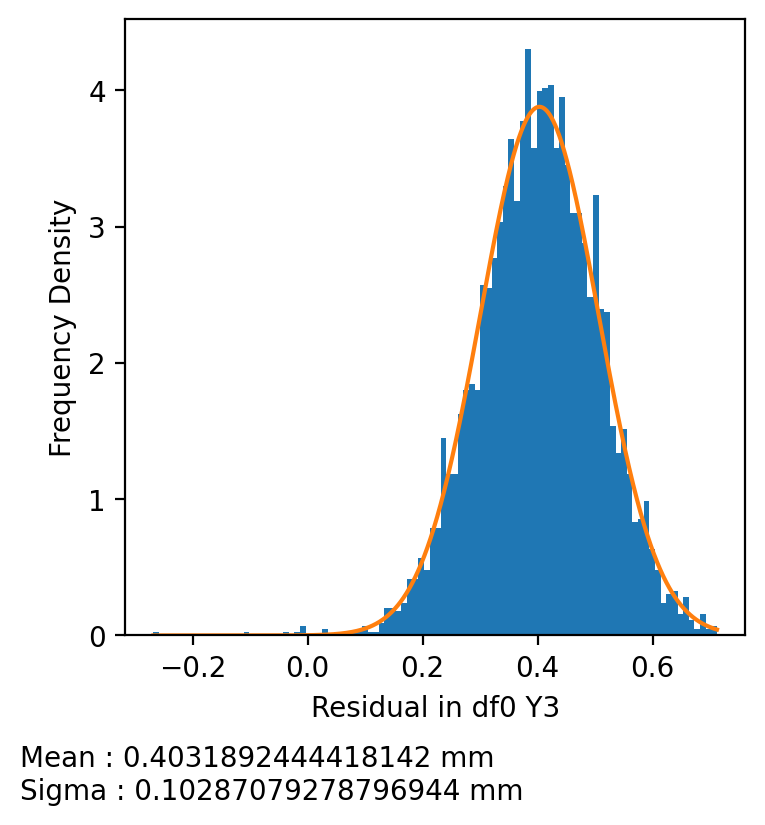

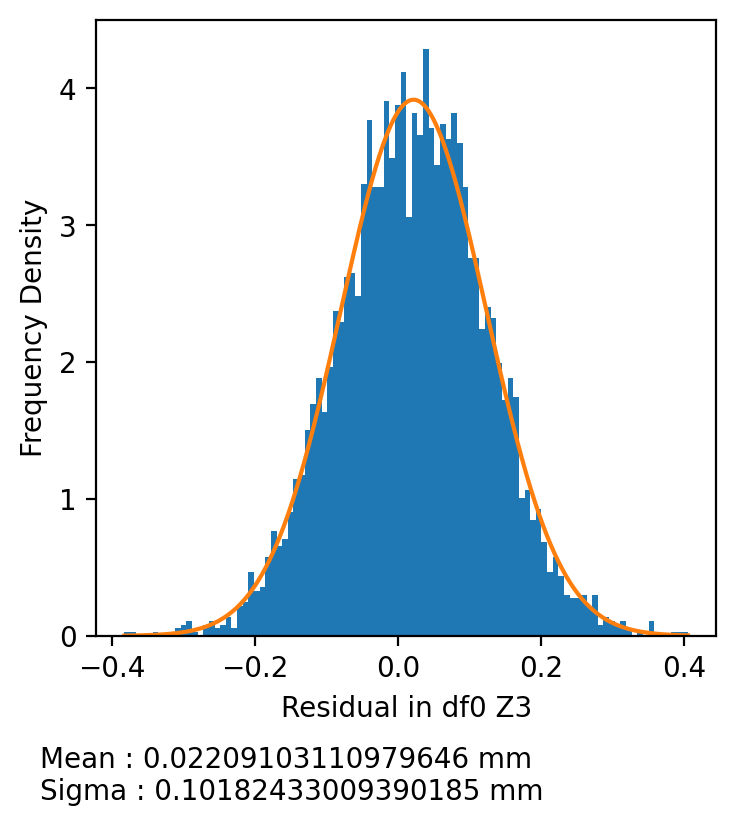

Difference Offsets:
Y: 0.0005292278647345272
Z: 0.0011437557706458316
Expected Offsets:
Layer 4:
Y: 0.022847927059512232
Z: -0.33355548932372553


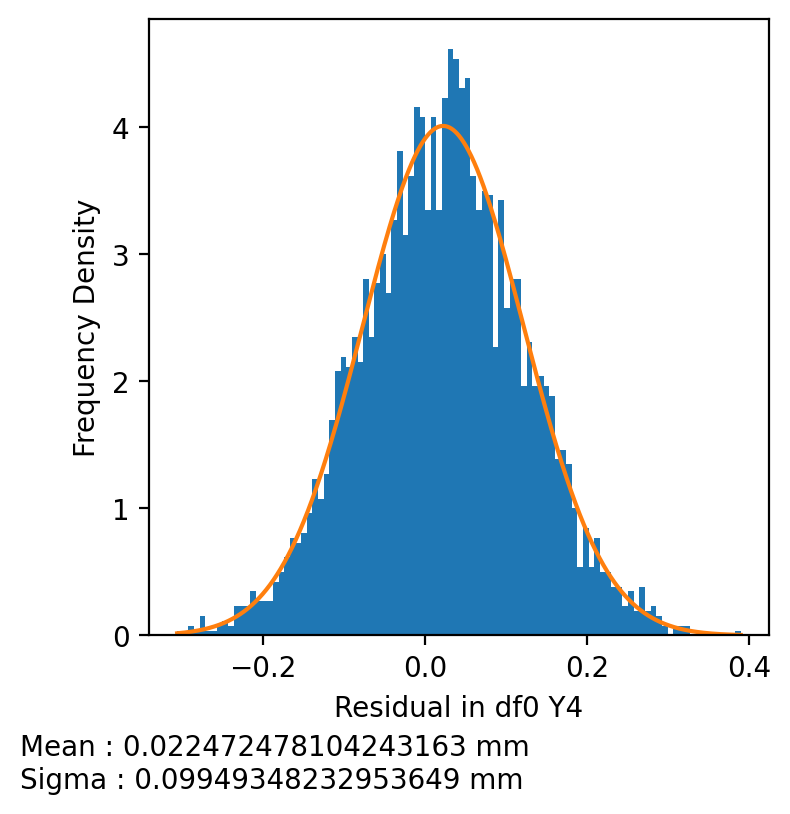

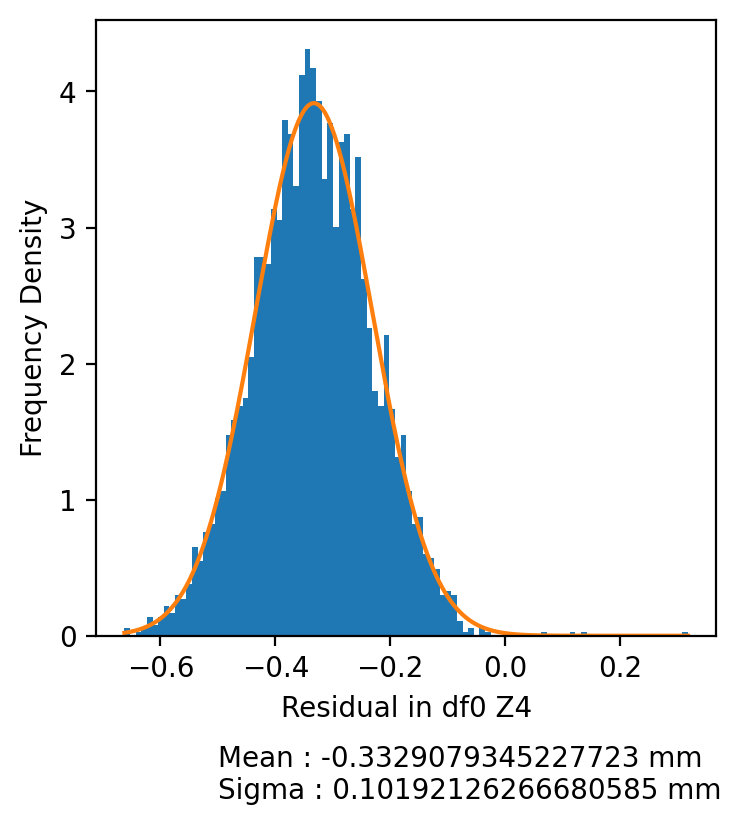

Difference Offsets:
Y: 0.00037544895526906916
Z: 0.0006475548009532428
Expected Offsets:
Layer 5:
Y: -0.1873326198982973
Z: 0.12401400255944568


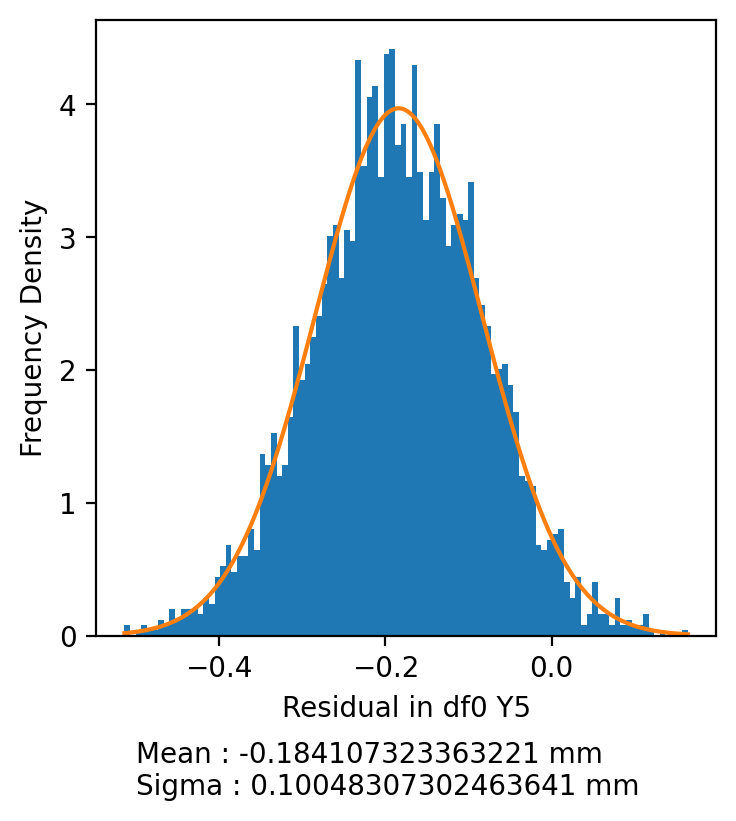

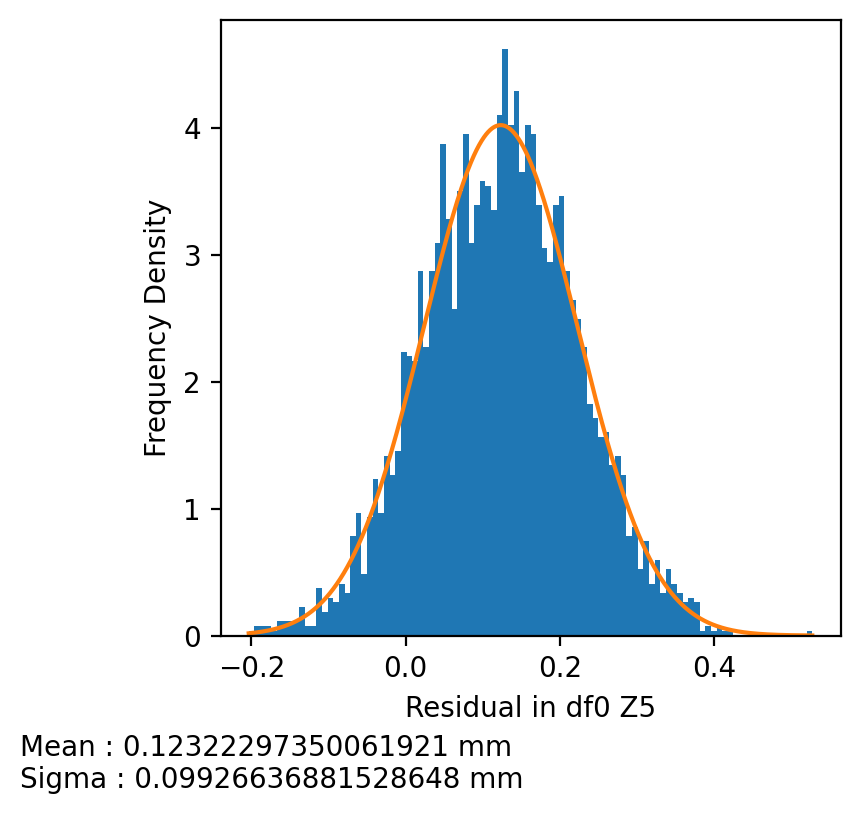

Difference Offsets:
Y: 0.003225296535076305
Z: 0.0007910290588264701
Expected Offsets:
Layer 6:
Y: 0.1134163834378542
Z: -0.05654414593349299


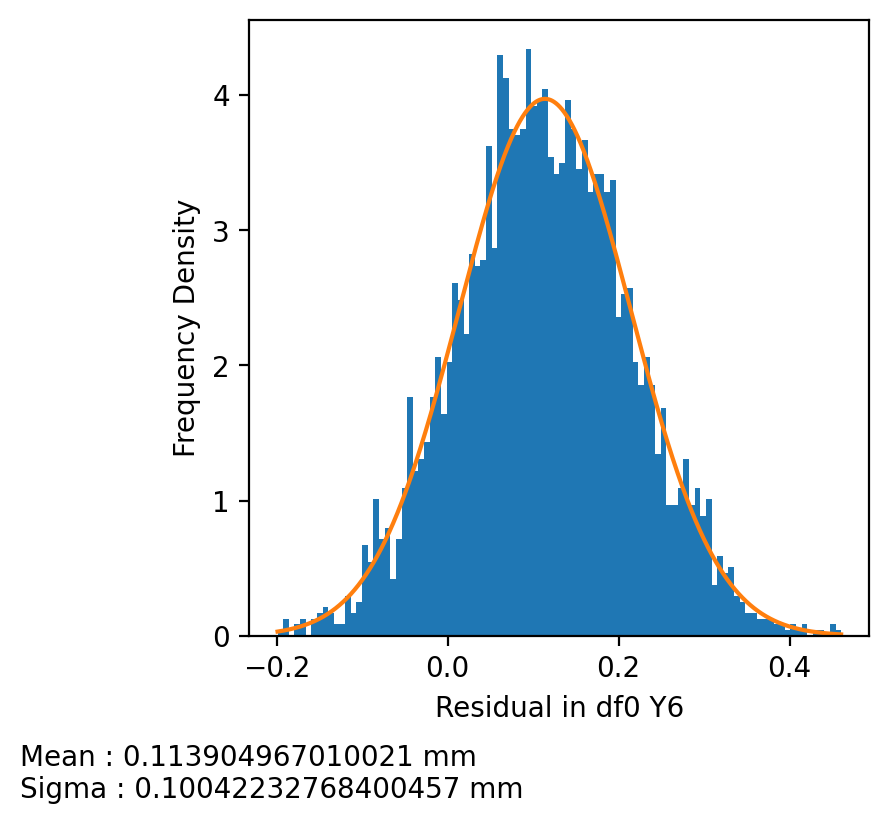

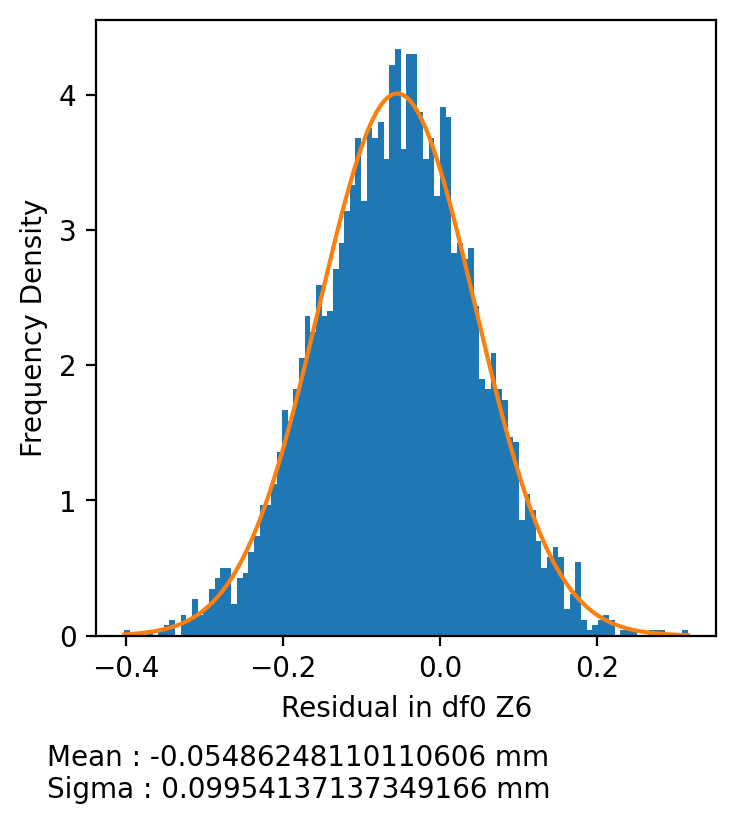

Difference Offsets:
Y: 0.0004885835721667869
Z: 0.0016816648323869296
Total Residual in Y: 0.0057865658604918085
Total Residual in Z: 0.008245068370976522


In [11]:
Plot_Dataframe(df13, offsets_y[13], offsets_z[13], tag = "df0")

In [14]:
total_rel_err = np.array([])
total_res = np.array([])

for i in range(1, 6):   
    total_rel_err = np.append(total_rel_err, offset_df["REL_ERROR_Z_" + str(i+1)])
    total_rel_err = np.append(total_rel_err, offset_df["REL_ERROR_Y_" + str(i+1)])

    total_res = np.append(total_res, offset_df["RESIDUAL_Z_" + str(i+1)])
    total_res = np.append(total_res, offset_df["RESIDUAL_Y_" + str(i+1)])

total_offset = np.array([])

for i in range(0, len(offsets_y)):
    total_offset = np.append(total_offset, offsets_y[i])
    total_offset = np.append(total_offset, offsets_z[i])

In [15]:
total_res_squared = np.sum(total_res*total_res)
total_offset_squared = np.sum(total_offset*total_offset)
mean_rel_err = np.mean(np.abs(total_rel_err))
median_rel_err = np.median(np.abs(total_rel_err))

print(f"Sum of residuals squared: {total_res_squared}")
print(f"Sum of offsets squared (naive answer): {total_offset_squared}")
print(f"Mean percentage error: {mean_rel_err*100}")
print(f"Median percentage error: {median_rel_err*100}")

Sum of residuals squared: 0.0010761520086122374
Sum of offsets squared (naive answer): 21.550900397636596
Mean percentage error: 4.750606107096377
Median percentage error: 0.6700421262586244


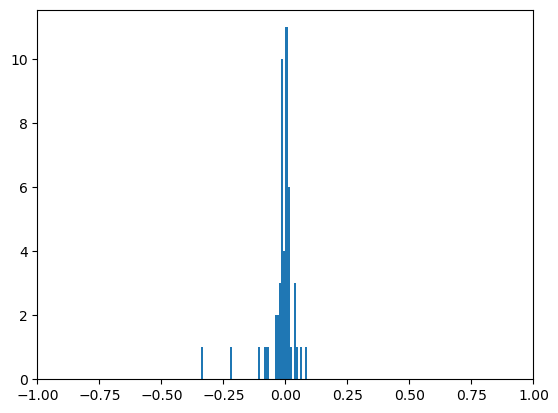

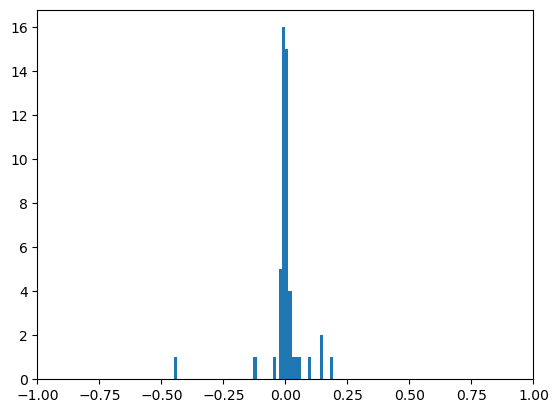

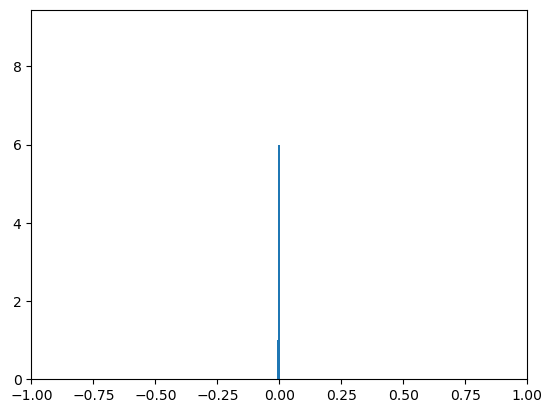

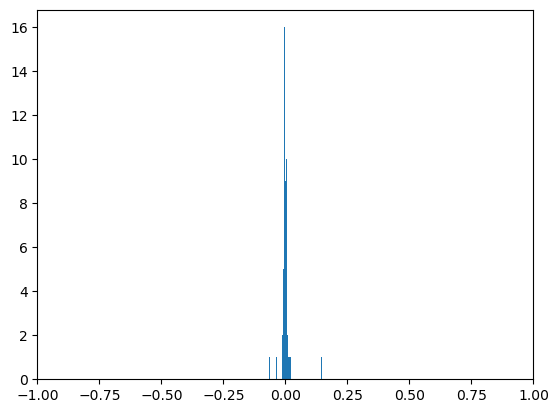

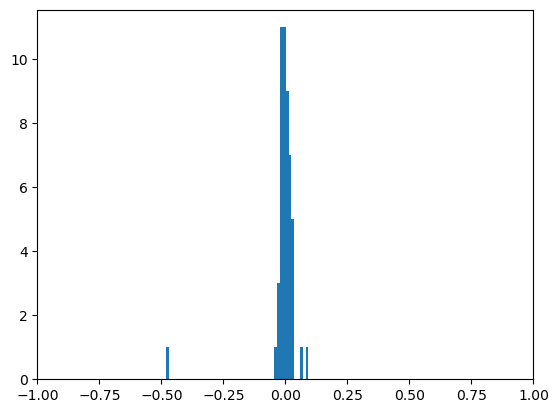

In [16]:
for i in range(1, 6):
    plt.hist(offset_df["REL_ERROR_Z_" + str(i+1)], bins = len(offset_df))
    plt.xlim(-1, 1)
    plt.show()

In [23]:
def Show_Trajectory(df):
    plt.figure(figsize = (4, 4), dpi = 200)
    for row in range(0, 1):
        plt.scatter(x = [df["X_TRUTH_1"][row], df["X_TRUTH_2"][row], df["X_TRUTH_3"][row], df["X_TRUTH_4"][row], df["X_TRUTH_5"][row], df["X_TRUTH_6"][row]],
                    y = [df["GLOBAL_Y_HIT_1"][row], df["GLOBAL_Y_HIT_2"][row], df["GLOBAL_Y_HIT_3"][row], df["GLOBAL_Y_HIT_4"][row], df["GLOBAL_Y_HIT_5"][row], df["GLOBAL_Y_HIT_6"][row]],
                    s = 0.5)
        
        plt.scatter(x = [df["X_TRUTH_1"][row], df["X_TRUTH_2"][row], df["X_TRUTH_3"][row], df["X_TRUTH_4"][row], df["X_TRUTH_5"][row], df["X_TRUTH_6"][row]],
                    y = [df["Y_TRUTH_1"][row], df["Y_TRUTH_2"][row], df["Y_TRUTH_3"][row], df["Y_TRUTH_4"][row], df["Y_TRUTH_5"][row], df["Y_TRUTH_6"][row]],
                    s = 0.5)
    plt.show()

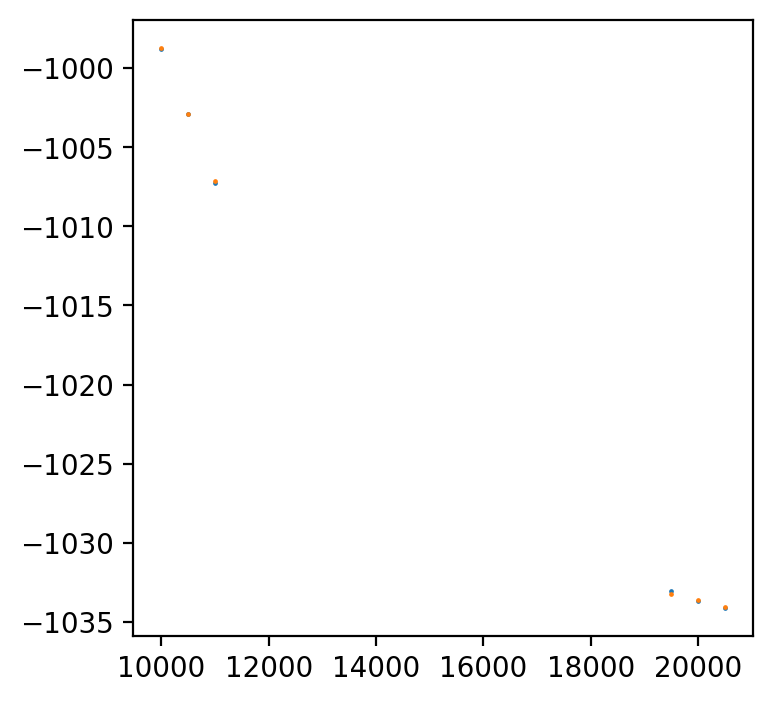

In [24]:
Show_Trajectory(df8)